# Loading in Data and packages

In [76]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# reading in the data 
nflx_top = pd.read_excel("Downloads/NFLX_DS_data_8_23.xlsx", sheet_name = 'NFLX Top 10')
rating = pd.read_excel("Downloads/NFLX_DS_data_8_23.xlsx", sheet_name = 'IMDb Rating')
runtime = pd. read_excel("Downloads/NFLX_DS_data_8_23.xlsx", sheet_name = 'Runtime')

Checking that the data was read in correctly we can take a look at the first five values of each of the datasets and see that there were no errors in reading the data in.

In [14]:
nflx_top.head()

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
0,Films (English),2,129110000,NaN,1,Red Notice,2022-01-04,2021-11-21
1,Films (English),1,20480000,NaN,2,There's Someone Inside Your House,2022-01-04,2021-10-10
2,TV (Non-English),1,10140000,Elite: Season 2,8,Elite,2022-01-04,2021-07-04
3,TV (English),2,58960000,Love Is Blind: Season 2,2,Love Is Blind,2022-02-22,2022-02-20
4,TV (English),5,10480000,All American: Season 3,9,All American,2022-01-04,2021-08-29


In [15]:
rating.head()

,title,rating
0,Supergirl,4.4
1,Laws of Attraction,0.0
2,Diary of a Wimpy Kid: The Long Haul,4.2
3,Riding in Cars with Boys,6.5
4,Crisis: Special Security Squad,6.3


In [16]:
runtime.head()

,title,runtime
0,Upstart Crow,29
1,Broadchurch,48
2,Har Kisse Ke Hisse: Kaamyaab,109
3,Ronaldo Vs Messi: Face Off!,67
4,ドラゴンボールZ 超戦士撃破!!勝つのはオレだ,47


In [18]:
nflx_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   category                    1440 non-null   object        
 1   cumulative_weeks_in_top_10  1440 non-null   int64         
 2   weekly_hours_viewed         1440 non-null   int64         
 3   season_title                708 non-null    object        
 4   weekly_rank                 1440 non-null   int64         
 5   show_title                  1440 non-null   object        
 6   date_added                  1440 non-null   datetime64[ns]
 7   week                        1440 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 90.1+ KB


## TV Show (English)

Identify the TV Show(English) with the most appearances in the top 10 list(treat each row in the data as separate appearances). What were the average weekly viewed hours for that show across all appearances?

First lets sort our dataset, for now we are only interested in the category TV (English) therefore lets extract that information from our data.

In [33]:
english_tv = nflx_top['category'] == "TV (English)"
english_tv = nflx_top[english_tv]

english_tv.head()

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
3,TV (English),2,58960000,Love Is Blind: Season 2,2,Love Is Blind,2022-02-22,2022-02-20
4,TV (English),5,10480000,All American: Season 3,9,All American,2022-01-04,2021-08-29
20,TV (English),4,18770000,Locke & Key: Season 2,7,Locke & Key,2022-01-04,2021-11-14
21,TV (English),1,86730000,Sex/Life: Season 1,1,Sex/Life,2022-01-04,2021-07-04
29,TV (English),2,29680000,Atypical: Season 4,4,Atypical,2022-01-04,2021-07-18


Now we want to select the tv show that had the most appearances in the top 10 list. To do this we will first group by the title of the show and count the number of appearances for each show. Then we can take the show that has the most appearances.

In [34]:
count = english_tv['show_title'].value_counts()

In [35]:
most_counts = count.idxmax()

In [36]:
most_counts

'You'

In [45]:
you_df = english_tv[english_tv['show_title'] == 'You']
you_df

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
144,TV (English),4,52590000,You: Season 3,1,You,2022-01-04,2021-11-07
181,TV (English),1,23050000,You: Season 1,5,You,2022-01-04,2021-10-17
186,TV (English),2,179000000,You: Season 3,1,You,2022-01-04,2021-10-24
232,TV (English),1,133120000,You: Season 3,1,You,2022-01-04,2021-10-17
286,TV (English),8,12490000,You: Season 3,10,You,2022-01-04,2021-12-05
288,TV (English),7,17070000,You: Season 3,7,You,2022-01-04,2021-11-28
318,TV (English),5,11670000,You: Season 2,9,You,2022-01-04,2021-11-21
447,TV (English),3,29880000,You: Season 1,6,You,2022-01-04,2021-10-31
602,TV (English),6,23460000,You: Season 3,5,You,2022-01-04,2021-11-21
621,TV (English),4,20910000,You: Season 1,8,You,2022-01-04,2021-11-07


From above we can see that the TV show (English) with the most appearances in the top 10 was the show You.

In [49]:
average_hours = you_df['weekly_hours_viewed'].mean()
average_hours

43193333.333333336

Taking the mean of the column weekly hours viewed we can see that the average weekly viewed hours for You across all appearances was $43193333.333333336$

## Films (Non- English)

For the "Films(Non- English)" category, identify the film with lowest IMDb rating. What were the average weekly hours viewed for that film?

First we want to filter the Netflix Top 10 dataframe to only include data for Films (Non- English) and from there we can merge the dataframe we created to the IMDb ratings dataframe to find which film had the lowest rating. 

In [50]:
film_noneng = nflx_top['category'] == "Films (Non-English)"
film_noneng = nflx_top[film_noneng]

film_noneng.head()

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
11,Films (Non-English),2,6760000,NaN,5,The Privilege,2022-02-22,2022-02-20
12,Films (Non-English),3,2000000,NaN,9,Lulli,2022-01-18,2022-01-16
14,Films (Non-English),2,7420000,NaN,4,Love and Leashes,2022-02-22,2022-02-20
16,Films (Non-English),3,7190000,NaN,5,Major Grom: Plague Doctor,2022-01-04,2021-07-25
17,Films (Non-English),1,7370000,NaN,2,Haseen Dillruba,2022-01-04,2021-07-04


In [52]:
merge_df = pd.merge(film_noneng, rating, left_on = 'show_title', right_on = 'title')
merge_df.head()

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week,title,rating
0,Films (Non-English),2,6760000,NaN,5,The Privilege,2022-02-22,2022-02-20,The Privilege,4.6
1,Films (Non-English),1,18060000,NaN,2,The Privilege,2022-02-15,2022-02-13,The Privilege,4.6
2,Films (Non-English),3,2000000,NaN,9,Lulli,2022-01-18,2022-01-16,Lulli,4.7
3,Films (Non-English),1,15210000,NaN,1,Lulli,2022-01-04,2022-01-02,Lulli,4.7
4,Films (Non-English),2,4020000,NaN,6,Lulli,2022-01-11,2022-01-09,Lulli,4.7


In [58]:
merge_df = merge_df.drop(columns = 'title')
merge_df.head()

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week,rating
0,Films (Non-English),2,6760000,NaN,5,The Privilege,2022-02-22,2022-02-20,4.6
1,Films (Non-English),1,18060000,NaN,2,The Privilege,2022-02-15,2022-02-13,4.6
2,Films (Non-English),3,2000000,NaN,9,Lulli,2022-01-18,2022-01-16,4.7
3,Films (Non-English),1,15210000,NaN,1,Lulli,2022-01-04,2022-01-02,4.7
4,Films (Non-English),2,4020000,NaN,6,Lulli,2022-01-11,2022-01-09,4.7


In [59]:
min_rating = merge_df['rating'].idxmin()
min_rating

38

In [61]:
min_rating = merge_df.loc[min_rating]

In [62]:
min_rating

category                      Films (Non-English)
cumulative_weeks_in_top_10                      2
weekly_hours_viewed                       1250000
season_title                                  NaN
weekly_rank                                     9
show_title                                 Fierce
date_added                    2022-02-08 00:00:00
week                          2022-02-06 00:00:00
rating                                        0.0
Name: 38, dtype: object

In [64]:
fierce_df = merge_df[merge_df['show_title'] == 'Fierce']
fierce_df

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week,rating
38,Films (Non-English),2,1250000,NaN,9,Fierce,2022-02-08,2022-02-06,0.0
39,Films (Non-English),1,1800000,NaN,8,Fierce,2022-01-04,2021-11-14,0.0


In [65]:
avg_hours= fierce_df['weekly_hours_viewed'].mean()
avg_hours

1525000.0

The average weekly hours viewed for the film Fierce was $1525000$ hours

## Films (English)

Identify the film in the "Films (English)" category with the most cumulative weeks in the top 10. How could you approximate how many users watched this show? What assumptions would you make? What risks are there to your approach? 

First we want to only focus on the Films (English) data therfore we will again filter our NFLX Top 10 data to only include that data.

In [66]:
film_eng = nflx_top['category'] == "Films (English)"
film_eng = nflx_top[film_eng]

film_eng.head()

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
0,Films (English),2,129110000,NaN,1,Red Notice,2022-01-04,2021-11-21
1,Films (English),1,20480000,NaN,2,There's Someone Inside Your House,2022-01-04,2021-10-10
7,Films (English),1,47700000,NaN,2,Bruised,2022-01-04,2021-11-28
9,Films (English),1,10110000,NaN,6,The Secret Life of Pets,2022-01-04,2021-08-22
13,Films (English),3,24750000,NaN,4,Back to the Outback,2022-01-04,2021-12-26


In [67]:
count = film_eng['show_title'].value_counts() 
most_counts = count.idxmax()
most_counts

'Red Notice'

In [70]:
count = film_eng['cumulative_weeks_in_top_10'].idxmax()
count

449

In [71]:
most_weeks = film_eng.loc[count]
most_weeks

category                          Films (English)
cumulative_weeks_in_top_10                     13
weekly_hours_viewed                       4970000
season_title                                  NaN
weekly_rank                                    10
show_title                             Red Notice
date_added                    2022-03-01 00:00:00
week                          2022-02-27 00:00:00
Name: 449, dtype: object

In [72]:
# another way to do this is to sort the data frame from largest to smallest based on the column 'cumulative_weeks_in
#_top_10'
sorted_film_eng = film_eng.sort_values(by='cumulative_weeks_in_top_10', ascending=False)
sorted_film_eng.head()

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
449,Films (English),13,4970000,NaN,10,Red Notice,2022-03-01,2022-02-27
358,Films (English),12,6540000,NaN,6,Red Notice,2022-02-01,2022-01-30
374,Films (English),11,7310000,NaN,8,Red Notice,2022-01-25,2022-01-23
41,Films (English),10,8710000,NaN,6,Red Notice,2022-01-18,2022-01-16
716,Films (English),9,11090000,NaN,6,Red Notice,2022-01-11,2022-01-09


The Film (English) with the most cumulative weeks in the top 10 was the film Red Notice with 13 weeks!

To approximate how many users viewed this film one could divide the weekly_hours_viewed by the runtime of the movie which will approximate how many separate instances the film was watched. The assumption to this method is that each instance the movie is viewed it is by a different user and we are taking away the fact that one user could have watched this movie multiple times. The risks to this approach are that not every user watches an entire movie in one sitting, some viewers might watch only a portion of the movie while others may be rewatching it.

## Weekly Hours Viewed 

If you plot weekly hours viewed over time (as an aggregate and for each of the four categories) what trends do you notice?

In [101]:
english_tv.head()
film_noneng.head()
film_eng.head()

noneng_tv = nflx_top['category'] == 'TV (Non-English)'
noneng_tv = nflx_top[noneng_tv]
noneng_tv.head()

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
2,TV (Non-English),1,10140000,Elite: Season 2,8,Elite,2022-01-04,2021-07-04
5,TV (Non-English),1,28270000,"Newly Rich, Newly Poor: Season 1",3,"Newly Rich, Newly Poor",2022-01-04,2021-07-04
6,TV (Non-English),4,12150000,Money Heist: Part 1,6,Money Heist,2022-01-04,2021-09-26
8,TV (Non-English),13,13000000,Money Heist: Part 5,7,Money Heist,2022-01-18,2022-01-16
10,TV (Non-English),1,11850000,Twenty Five Twenty One: Season 1,7,Twenty Five Twenty One,2022-03-01,2022-02-27


Now we have each of the four categories separated into its own dataframes, we can now plot the weekly hours viewed against time.

In [92]:
copy_noneng_tv = noneng_tv.copy()

In [94]:
copy_noneng_tv.head()

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
2,TV (Non-English),1,10140000,Elite: Season 2,8,Elite,2022-01-04,2021-07-04
5,TV (Non-English),1,28270000,"Newly Rich, Newly Poor: Season 1",3,"Newly Rich, Newly Poor",2022-01-04,2021-07-04
6,TV (Non-English),4,12150000,Money Heist: Part 1,6,Money Heist,2022-01-04,2021-09-26
8,TV (Non-English),13,13000000,Money Heist: Part 5,7,Money Heist,2022-01-18,2022-01-16
10,TV (Non-English),1,11850000,Twenty Five Twenty One: Season 1,7,Twenty Five Twenty One,2022-03-01,2022-02-27


In [95]:
# first convert the date_added column to a datetime format
copy_noneng_tv.loc[:, 'date_added'] = pd.to_datetime(copy_noneng_tv['date_added'])


In [100]:
copy_noneng_tv['date_added'].head()

2    2022-01-04
5    2022-01-04
6    2022-01-04
8    2022-01-18
10   2022-03-01
Name: date_added, dtype: datetime64[ns]

In [97]:
grouped_noneng_tv = copy_noneng_tv.groupby('date_added')['weekly_hours_viewed'].sum()
grouped_noneng_tv

date_added
2022-01-04    7068570000
2022-01-11     267840000
2022-01-18     250440000
2022-01-25     222770000
2022-02-01     349350000
2022-02-08     478020000
2022-02-15     314560000
2022-02-22     239250000
2022-03-01     173640000
2022-03-09     183340000
Name: weekly_hours_viewed, dtype: int64

In [108]:
grouped_engtv = english_tv.groupby('date_added')['weekly_hours_viewed'].sum()
grouped_engtv

date_added
2022-01-04    8155340000
2022-01-11     451890000
2022-01-18     286090000
2022-01-25     346730000
2022-02-01     343980000
2022-02-08     339650000
2022-02-15     312940000
2022-02-22     387730000
2022-03-01     386570000
2022-03-09     398230000
Name: weekly_hours_viewed, dtype: int64

In [111]:
grouped_film_noneng = film_noneng.groupby('date_added')['weekly_hours_viewed'].sum()
grouped_film_noneng

date_added
2022-01-04    1504810000
2022-01-11      51290000
2022-01-18      41480000
2022-01-25      35570000
2022-02-01      39410000
2022-02-08      67280000
2022-02-15      96350000
2022-02-22      71260000
2022-03-01      68510000
2022-03-09      73800000
Name: weekly_hours_viewed, dtype: int64

In [114]:
grouped_film_eng = film_eng.groupby('date_added')['weekly_hours_viewed'].sum()
grouped_film_eng

date_added
2022-01-04    4588460000
2022-01-11     184480000
2022-01-18     155830000
2022-01-25     155880000
2022-02-01     112340000
2022-02-08     151610000
2022-02-15     164410000
2022-02-22     153400000
2022-03-01     119250000
2022-03-09     166620000
Name: weekly_hours_viewed, dtype: int64

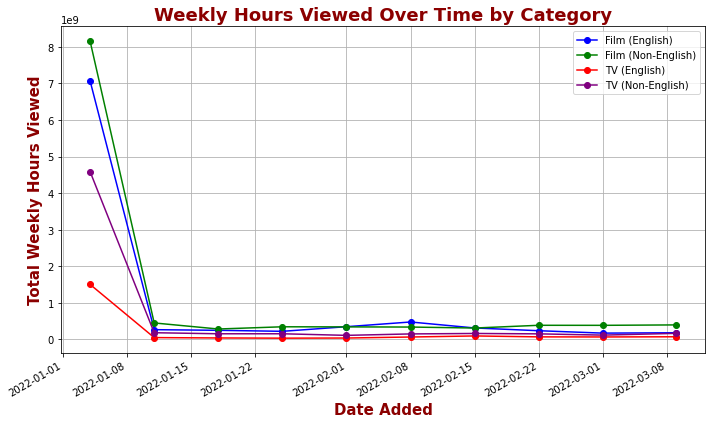

In [124]:
plt.figure(figsize=(10,6))
ax = plt.gca()

grouped_data = [grouped_noneng_tv, grouped_engtv, grouped_film_noneng, grouped_film_eng]
categories = ['Film (English)', 'Film (Non-English)', 'TV (English)', 'TV (Non-English)']
colors = ['blue', 'green', 'red', 'purple']

for i, grouped_df in enumerate(grouped_data):
    grouped_df.plot(kind = 'line', marker = 'o', linestyle = '-', color =colors[i], ax =ax, label =categories[i])
    
plt.title ('Weekly Hours Viewed Over Time by Category',fontsize=18, color='darkred', fontweight='bold', loc='center')
plt.xlabel ('Date Added', fontsize=15, color='darkred', fontweight='bold')
plt.ylabel ('Total Weekly Hours Viewed',fontsize=15, color='darkred', fontweight='bold')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Now that we have plotted each of the four categories' weekly hours viewed over time we can see that there is a similar trend for each of the categories: at the beginning of the year there is a large aggregate of weekly hours viewed followed by a large decrease in hours during the second week of January. This can be attributed to a number of factors, for instance since it is around the Holidays more people are on vacation and are able to stream more thus the influx of hours viewed. There is also a higher number of films being watched compared to tv shows. 

## Key Investor Question

Another key investor question is how many US subscribers Netflix has each quarter. Name one type of dataset you could use to answer this question. How would this data source help you estimate Neflix's US subscribers? 

A dataset that would be useful in estimating Netflix's US subscribers for each quarter would be 

## Web Scraping Methodology

List three reasons why our web scraping methodology may be inaccurate.

* Missing Data: Since not all users place a review or rate the movie or show they are watching on IMDb, this could lead to missing rates or incomplete data that could provide skewness to the data toward titles that are more popular or well known.

* Outside Factors: There are other outside factors such as holidays, trends, or marketing efforts that can be influencing the title being on the top 10 list that the data is not taking into account. 

* Runtime Change: Movies or TV shows can have varying runtimes which might change during the initial web scraping. This would lead to incorrect calculations during the analysis of the data.